# Tutorial for Segmenting Synovial Cell Nuclei in an H&E Stained Image

Authors: Steven Guan, James R. Thompson, and David Slater

Copyright 2021, The MITRE Corporation Approved for Public Release; Distribution Unlimited. Case Number 21-0081.

Licensed under the Apache License, Version 2.0 (the "License"); you may not use this file except in compliance with the License.
You may obtain a copy of the License at http://www.apache.org/licenses/LICENSE-2.0
Unless required by applicable law or agreed to in writing, 
software distributed under the License is distributed on an "AS IS" BASIS,
WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
See the License for the specific language governing permissions and limitations under the License.

## Import Libraries

In [1]:
import skimage.io
import segment
import matplotlib.pyplot as plt
import numpy as np

## Load H&E stained image

Text(0.5, 1.0, 'Example H&E Stained Image')

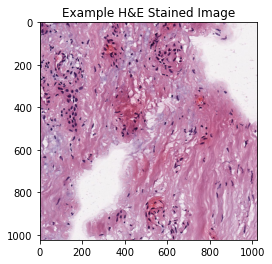

In [2]:
im = skimage.io.imread('example_image.jpg')

plt.imshow(im)
plt.title('Example H&E Stained Image')

# Quantifying the amount of tissue in the image

Proportion of image containing tissue: 0.806


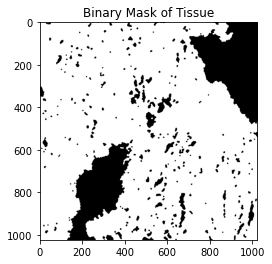

In [8]:
tissue, tissue_mask = segment.find_tissue(im)

plt.imshow(tissue_mask, cmap='gray')
plt.title('Binary Mask of Tissue')
print('Proportion of image containing tissue: ' + str(np.round(tissue,3)))


# Color deconvolution to separate stain concentrations

(1024, 1024, 3)


Text(0.5, 1.0, 'Eosin Stain Concentration')

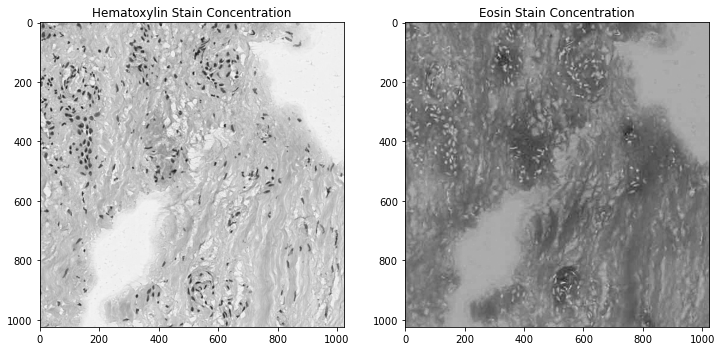

In [37]:
im_deconv = segment.color_deconvolution(im)
im_hem = im_deconv[:,:,0]
im_eos = im_deconv[:,:,1]

fig, axs = plt.subplots(1, 2, figsize=(12, 6))
axs[0].imshow(im_hem, cmap='gray')
axs[0].set_title('Hematoxylin Stain Concentration')
axs[1].imshow(im_eos, cmap='gray')
axs[1].set_title('Eosin Stain Concentration')


# Image binarization using local adaptive thresholding

Text(0.5, 1.0, 'Binarized Image')

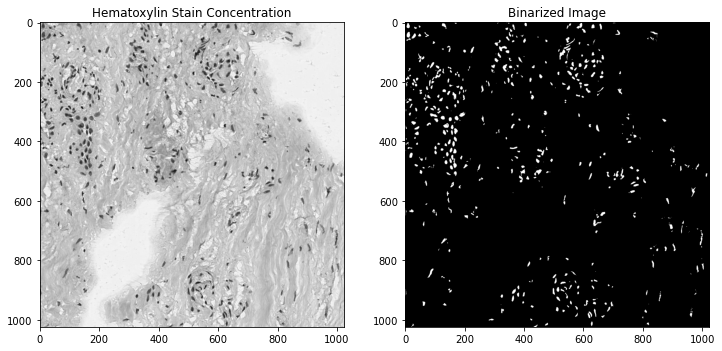

In [42]:
foreground_threshold = 160
im_bin = segment.binarize_image(im, im_hem, foreground_threshold)

fig, axs = plt.subplots(1, 2, figsize=(12, 6))
axs[0].imshow(im_hem, cmap='gray')
axs[0].set_title('Hematoxylin Stain Concentration')
axs[1].imshow(im_bin, cmap='gray')
axs[1].set_title('Binarized Image')

# Individual nuclei segmentation using the watershed method

Text(0.5, 1.0, 'Color Mask Visualization')

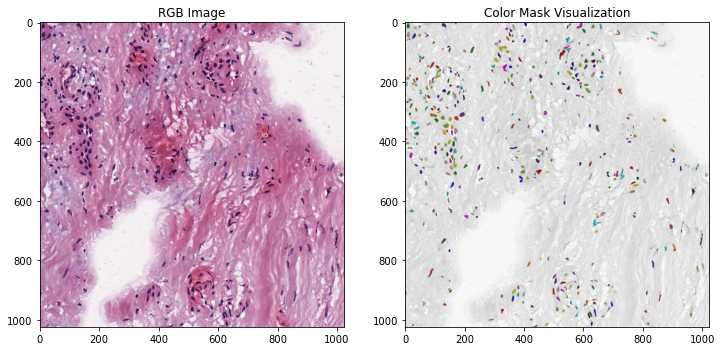

In [50]:
im_markers, obj_props = segment.find_nuclei(im, im_hem, im_bin)

fig, axs = plt.subplots(1, 2, figsize=(12, 6))
axs[0].imshow(im)
axs[0].set_title('RGB Image')
axs[1].imshow(skimage.color.label2rgb(im_markers, im_hem, bg_label=1, alpha=0.5, bg_color=[1,1,1]))
axs[1].set_title('Color Mask Visualization')